In [1]:
using HDF5
using LinearAlgebra, Statistics
#using PyPlot

include("model.jl")

model_comparison

In [4]:
k = 1000;
q = 50;
#hyperparameters

In [5]:
ref_spectra = read(h5open("/data/praveen/results/resampled_training_spectra_li.h5", "r")["spectra"]); #reads in the reference spectra 

In [6]:
wl_grid = read(h5open("/data/praveen/results/wl_grid.h5", "r")["wl_grid"]);

In [7]:
#Halpha mask
line_mask = 6550 .< wl_grid .< 6580;

In [8]:
resampled_test_spectra= read(h5open("/data/praveen/results/resampled_test_spectra1.h5", "r")["spectra"]);

In [9]:
resampled_test_error = read(h5open("/data/praveen/results/resampled_test_errors1.h5", "r")["errors"]);

In [10]:
columns = 1
rows = 4459
A = zeros(rows, columns);

In [11]:
for i in 1:5000
    #global var = []
    test_spectra = resampled_test_spectra[:,i]
    test_ivar = resampled_test_error[:,i]
    pf = predict_spectral_range(test_spectra, test_ivar, ref_spectra', nothing, k, q, line_mask)
    pf_append = vec(pf)
    A = hcat(A, pf_append)
end

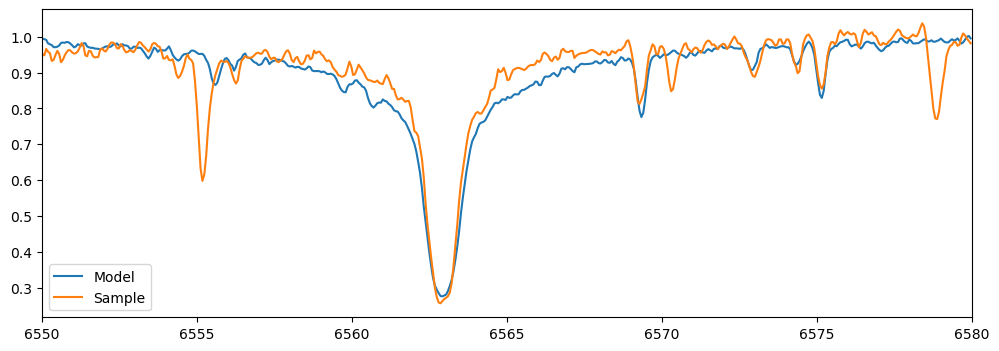

(6550.0, 6580.0)

In [20]:
figure(figsize=(12, 4))
plot(wl_grid[line_mask], A[:,2][line_mask], label="Model")
plot(wl_grid[line_mask], resampled_test_spectra[:,1][line_mask], label="Sample")
legend()
plt.xlim([6550,6580])
#vline!([6707.85], [0,1.050])

In [12]:
size(A)

(4459, 5001)

In [11]:
secondary_mask = 6552.5.< wl_grid.< 6557.5;

In [13]:
figure(figsize=(12, 4))
plot(wl_grid[secondary_mask], A[:,2][secondary_mask], label="Model")
plot(wl_grid[secondary_mask], resampled_test_spectra[:,1][secondary_mask], label="Sample")
legend()
plt.xlim([6552.5,6557.5]) #zoomed in 

LoadError: UndefVarError: figure not defined

In [14]:
fid = h5open("/data/praveen/results_5K_1_halpha.h5", "w")

🗂️ HDF5.File: (read-write) /data/praveen/results_5K_1_halpha.h5

In [15]:
fid["spectra"] = A

4459×5001 Matrix{Float64}:
 0.0  1.0       1.0  1.0       0.999225  …  1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999407     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999365     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999149     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999407     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999971  …  1.0       1.0      1.0
 0.0  1.0       1.0  1.0       1.00017      1.0       1.0      1.0
 0.0  1.0       1.0  1.0       1.00007      1.0       1.0      1.0
 0.0  1.0       1.0  1.0       1.00006      1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999921     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999623  …  1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999507     1.0       1.0      1.0
 0.0  1.0       1.0  1.0       0.999603     1.0       1.0      1.0
 ⋮                                       ⋱                     ⋮
 0.0  0.995046  1.0  0.998942  1.0001

In [16]:
close(fid)

In [15]:
#create_dataset(fid, "results_5K_1_halpha", A)

(HDF5.Dataset: /results_5K_1_halpha (file: results_5K_1_halpha.h5 xfer_mode: 0), HDF5.Datatype: H5T_IEEE_F64LE)

In [16]:
close(fid)

In [29]:
B = read(h5open("results_5K_1_halpha.h5", "r")["spectra"])

4459×6 Array{Float64,2}:
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 ⋮                        ⋮
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0
 0.0  1.0  1.0  1.0  1.0  1.0

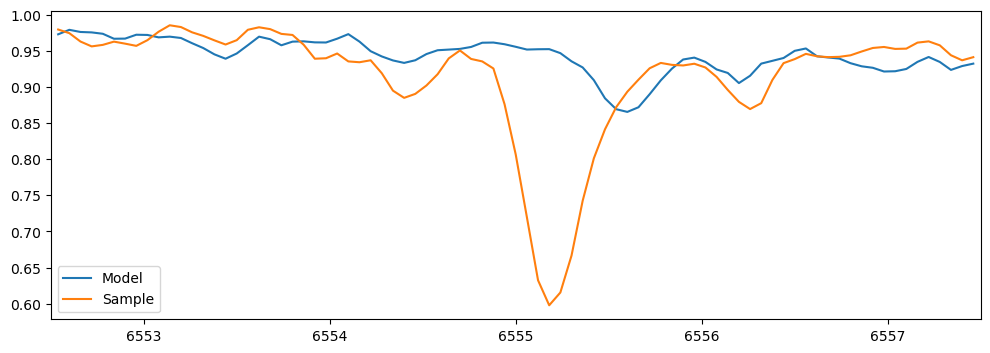

(6552.5, 6557.5)

In [30]:
figure(figsize=(12, 4))
plot(wl_grid[secondary_mask], B[:,2][secondary_mask], label="Model")
plot(wl_grid[secondary_mask], resampled_test_spectra[:,1][secondary_mask], label="Sample")
legend()
plt.xlim([6552.5,6557.5]) #zoomed in 

In [13]:
mean(A[:,2][secondary_mask] - resampled_test_spectra[:,1][secondary_mask]) #higher values are better 

0.027376948663042563

In [151]:
mean(A[:,2][line_mask] - resampled_test_spectra[:,1][line_mask])

-0.010541575808934426

In [44]:
pf = predict_spectral_range(test_spectra, test_ivar, ref_spectra', nothing, k, q, line_mask);

In [45]:
mean(pf[line_mask] - test_spectra[line_mask])

-0.010541575808934426

In [46]:
pf[line_mask]

500-element Array{Float64,1}:
 0.9949653012327286
 0.9933820273387158
 0.9916467074745778
 0.9816445878115957
 0.9791100006596158
 0.9767120252966124
 0.9710590629416853
 0.9710207630689871
 0.9723377170560682
 0.9757204172790475
 0.9830500789701135
 0.9838816565302931
 0.9833745866246166
 ⋮
 0.98922843579101
 0.9932008308447602
 0.9894783112368724
 0.9913401311827792
 0.995637009150482
 0.9887618256166755
 0.9810738029783558
 0.9845443593701549
 0.9918628993734598
 0.9998567079998365
 1.0023831269972863
 0.9957153732287681

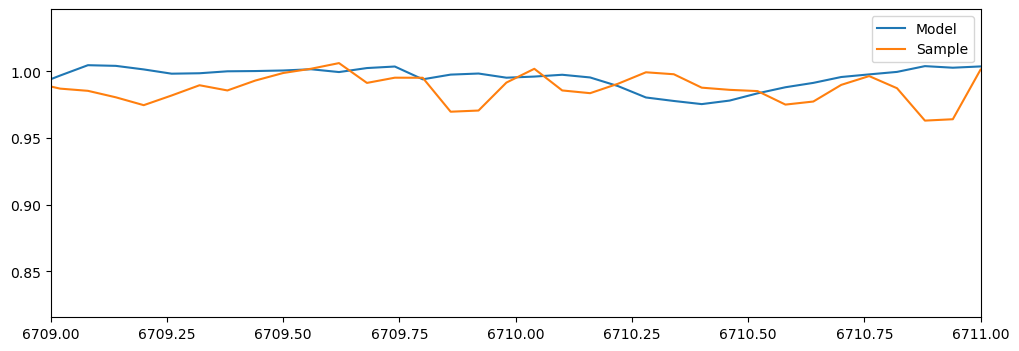

(6709.0, 6711.0)

In [94]:
figure(figsize=(12, 4))
plot(wl_grid[line_mask], pf[line_mask], label="Model")
plot(wl_grid[line_mask], test_spectra[line_mask], label="Sample")
legend()
plt.xlim([6709,6711])
#vline!([6707.85], [0,1.050])

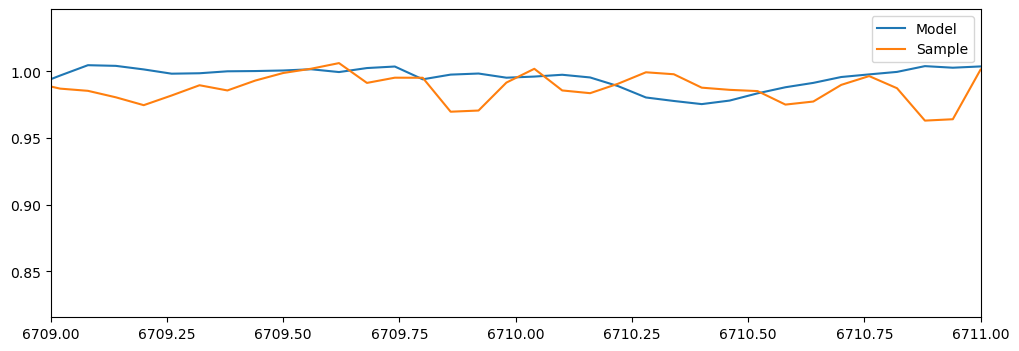

(6709.0, 6711.0)

In [22]:
figure(figsize=(12, 4))
plot(wl_grid[line_mask], pf[line_mask], label="Model")
plot(wl_grid[line_mask], test_spectra[line_mask], label="Sample")
legend()
plt.xlim([6709,6711])
#vline!([6707.85], [0,1.050])